In [1]:
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
data_training = pd.read_csv("/content/drive/My Drive/data poison/scenario2/25p_TRAINING_S2.csv")
data_testing = pd.read_csv("/content/drive/My Drive/data poison/scenario2/TESTING_NORMAL.csv")

In [4]:
#dropping the un-named Column
data_training = data_training.drop(data_training.columns[0], axis=1)
data_testing = data_testing.drop(data_testing.columns[0], axis=1)

In [5]:
y_train = data_training['Label']
x_train = data_training.drop(columns='Label', axis=1)
y_test = data_testing['Label']
x_test = data_testing.drop(columns='Label', axis=1)

In [6]:
#x_train = preprocessing.StandardScaler().fit(x_train).transform(x_train.astype(float))
#x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test.astype(float))

In [7]:
#K Nearest Neighbour
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
predict=model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))
print(confusion_matrix(y_test,predict))
cr = classification_report(y_test, predict)
print(cr)

Training Accuracy : 0.7653225806451613
Testing Accuracy : 0.6838709677419355
[[64 12  2  2]
 [ 6 55  6  7]
 [13  4 49 15]
 [19  9  3 44]]
              precision    recall  f1-score   support

           1       0.63      0.80      0.70        80
           2       0.69      0.74      0.71        74
           3       0.82      0.60      0.70        81
           4       0.65      0.59      0.62        75

    accuracy                           0.68       310
   macro avg       0.69      0.68      0.68       310
weighted avg       0.70      0.68      0.68       310



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


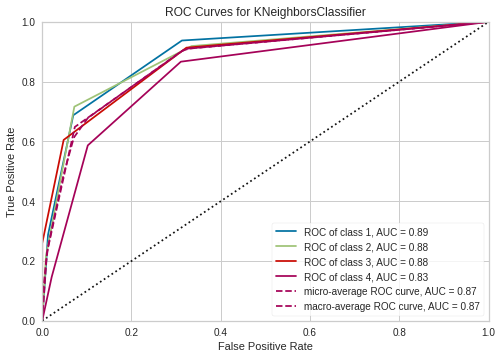

In [8]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(model)

visualizer.fit(x_train, y_train)       
visualizer.score(x_test, y_test)       
visualizer.show()

In [9]:
def plot_confusion_matrix(y_test, result, classes, normalize=False, title=None, cmap=plt.cm.Blues):
 """
431 This function prints and plots the confusion matrix.
432 Normalization can be applied by setting ‘normalize=True‘.
433 """
 if not title:
  if normalize:
    title = 'Normalized confusion matrix'
  else:
    title = 'Confusion matrix, without normalization'

 # Compute confusion matrix
 cm = confusion_matrix(y_test, result)
# Only use the labels that appear in the data
# classes = classes[unique_labels(y_test, result)]
 if normalize:
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  print("Normalized confusion matrix")
 else:
  print('Confusion matrix, without normalization')
 print(cm)
 fig, ax = plt.subplots()
 im = ax.imshow(cm, interpolation='nearest', cmap = cmap)
 ax.figure.colorbar(im, ax=ax)
 # We want to show all ticks...
 ax.set(xticks=np.arange(cm.shape[1]),
  yticks = np.arange(cm.shape[0]),
  # ... and label them with the respective list entries
  xticklabels = classes, yticklabels = classes,
  title = title,
  ylabel ='True label',
  xlabel ='Predicted label')
 # Rotate the tick labels and set their alignment.
 plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
 rotation_mode = "anchor")
 # Loop over data dimensions and create text annotations.
 fmt = '.2f' if normalize else 'd'
 thresh = cm.max() / 2.
 for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center", color="white" if cm[i, j] > thresh else "black")
 fig.tight_layout()
 return ax

Confusion matrix, without normalization
[[64 12  2  2]
 [ 6 55  6  7]
 [13  4 49 15]
 [19  9  3 44]]
Normalized confusion matrix
[[0.8  0.15 0.03 0.03]
 [0.08 0.74 0.08 0.09]
 [0.16 0.05 0.6  0.19]
 [0.25 0.12 0.04 0.59]]


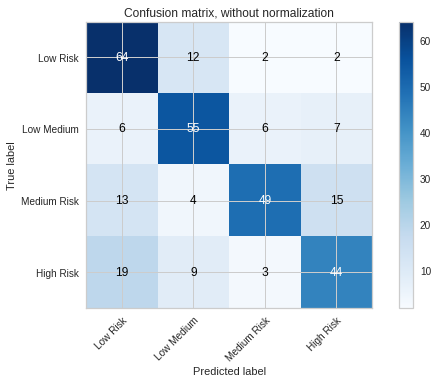

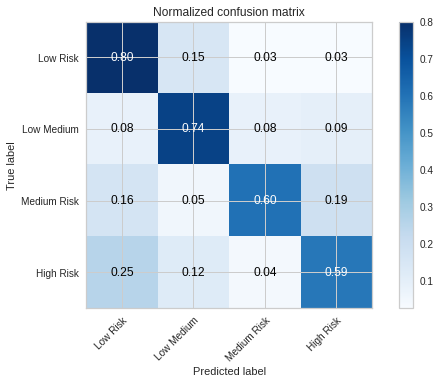

In [10]:
np.set_printoptions(precision=2)
class_names = ['Low Risk', 'Low Medium', 'Medium Risk', 'High Risk']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predict, classes=class_names, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predict, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [11]:
from sklearn import metrics
accu = metrics.accuracy_score(y_test, predict)
recall = metrics.recall_score(y_test, predict,average="macro")
precision = metrics.precision_score(y_test, predict,average="macro")
F1 = metrics.f1_score(y_test, predict,average="macro")
print(accu,recall,precision,F1)

0.6838709677419355 0.683712045378712 0.6946691176470589 0.6820006234899851


In [12]:
#from sklearn.externals import joblib
import joblib
joblib.dump(model,"rf_joblib_model")
rf = joblib.load("rf_joblib_model")

In [13]:
!pip install eli5
!pip install shap
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 18.6 MB/s 
     |████████████████████████████████| 133 kB 43.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=50d3b5763f6a706b3ea28ceb6ba5249760ddae3970eadfe4a64d4286b6c619a6
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incomp

In [14]:
# importing ML Explanability Libraries
#for purmutation importance
import eli5
from eli5.sklearn import PermutationImportance
#for SHAP values
import shap
from pdpbox import pdp, info_plots #for partial plots

In [16]:
perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.2858 ± 0.0595,Pz_THETA
0.1574 ± 0.0370,AF4_THETA
0.1555 ± 0.0225,AF3_THETA
0.1387 ± 0.0363,Pz_ALPHA
0.0716 ± 0.0221,AF4_LOW_BETA
0.0697 ± 0.0229,T8_ALPHA
0.0645 ± 0.0168,AF3_LOW_BETA
0.0587 ± 0.0236,T8_THETA
0.0542 ± 0.0309,AF3_ALPHA
0.0542 ± 0.0281,T8_LOW_BETA


In [17]:
from sklearn import tree

cls_t = tree.DecisionTreeClassifier()
cls_t.fit(x_test, predict)

DecisionTreeClassifier()

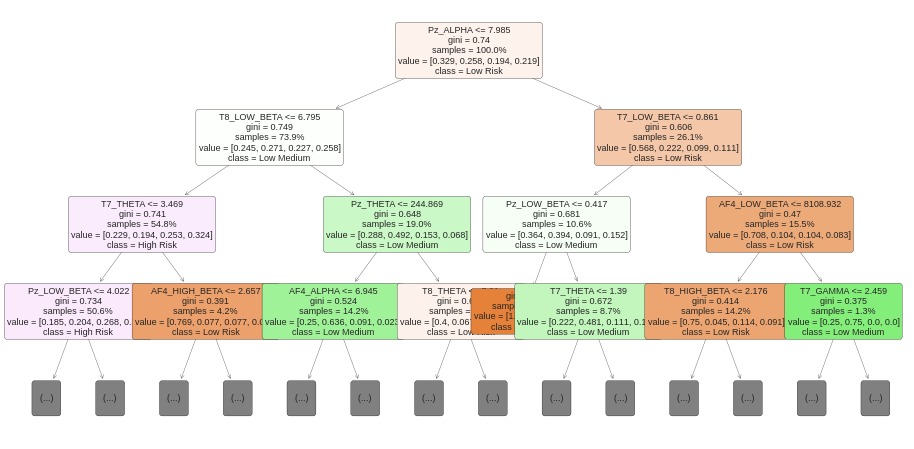

In [19]:
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(cls_t, feature_names = x_test.columns.tolist(), class_names = class_names, max_depth=3, fontsize=9, proportion=True, filled=True, rounded=True)